# Introduction

<img style="float: right;" src="./img/shopping-cart.png" height="180" width="180" />

A retail chain needs to analyse transactions daily and understand the profile of its consumers in various locations, according to their purchases / returns in various categories.

With the increase in competitiveness in the consumer market, it has never been more important to have the capacity to optimize business processes in order to satisfy consumers' expectations. Channelling efforts to manage and analyse data in order to work for the consumer while generating profits is particularly important for the survival of the business.

Ideally, the company's success in reaching out to its customers and "looking after" them is reflected in the data that a retailer maintains. Retailers create reports that summarize consumer behaviour using metrics such as conversion rate (*conversion rate*), average purchase value (*average order value*), purchase recency (*recency of purchase*) or total spend on recent transactions (*total amount spent in recent transactions*). These metrics give an overview of consumer trends.

Customer Intelligence is the practice of determining and delivering knowledge generated by analysing past information and predicting future consumer behaviour. To be effective, customer intelligence must combine data on *raw* transactions with data on behaviour to generate derived metrics.

In short, for large retailers, data analysis is increasingly applied in all phases of the *retail process* - measuring recently launched products, forecasting sales and future demand through predictive simulation, optimizing placement products and promotions with *customer heatmaps*, among many others.

---
Source (free translation): https://www.kaggle.com/darpan25bajaj/retail-case-study-data

---

[Python Cheatsheet](../utils/Python_Cheatsheet.pdf)

[Pandas Cheatsheet](../utils/Pandas_Cheat_Sheet.pdf)

[Numpy Cheatsheet](../utils/Numpy_Python_Cheat_Sheet.pdf)

---

## Import

**Necessary packages**

In [2]:
import os
import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
%ls input

Customer.csv*      Transactions.csv*  prod_cat_info.csv*


In [4]:
PATHTODATA = 'input' #create a variable to indicate data import path

---

**Import data (Transactions)**

In [5]:
filename = os.path.join(PATHTODATA, 'Transactions.csv')

In [6]:
transactions = pd.read_csv(filename, parse_dates=True)

# Exploratory Analysis

## Dataset

**"Peeking" the data - first notion of what we have**

**\# Rows and Columns**</br>
*It is important to keep the number of lines "controlled" in some operations, especially when adding new tables (check if the number of lines changes when not supposed)*

In [7]:
transactions.shape

(23053, 10)

In [8]:
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [9]:
transactions.tail()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop


**Type of variables and count of non-null values**

In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


**Descriptive statistics of numerical variables only**

In [11]:
transactions.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


**Descriptive statistics including all variables, numeric and non-numeric**

In [12]:
transactions.describe(include='all')

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
count,2.305300e+04,23053.000000,23053,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053
unique,NaN,NaN,1129,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,13-07-2011,NaN,NaN,NaN,NaN,NaN,NaN,e-Shop
freq,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,NaN,9311
mean,5.007348e+10,271021.746497,NaN,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,NaN
std,2.898194e+10,2431.692059,NaN,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,NaN
min,3.268991e+06,266783.000000,NaN,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,NaN
25%,2.493864e+10,268935.000000,NaN,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,NaN
50%,5.009313e+10,270980.000000,NaN,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,NaN
75%,7.533000e+10,273114.000000,NaN,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,NaN


In [13]:
transactions.nunique()

transaction_id      20878
cust_id              5506
tran_date            1129
prod_subcat_code       12
prod_cat_code           6
Qty                    10
Rate                 2551
Tax                  4194
total_amt            5764
Store_type              4
dtype: int64

---

### First impressions?

**From the above code we can see:**

+ The total number of customers
+ The number of transactions
+ The (id) of repeated transactions - returns
+ The 4 different types of store
+ Maximum products sold at once: 5
+ Maximum products returned at once: 5
+ Maximum amount spent per 1 transaction: 8287.5
+ There are no null values
+ There are outliers in the variable "total_amt"

### Questions that can be asked right now:

+ Confirm if there are transactions with more than one product (category + sub_category)
+ What types of products are returned?
+ Should the fee for returns be negative?
+ Do all returns have a corresponding purchase?

## Aditional information

**Before proceeding with the analysis, let's add the descriptions to the products. Not being essential for an exploratory analysis for modeling purposes, they make the data more 'readable' and are even necessary if we are thinking of presenting the results to some type of audience.**

In [14]:
categories = pd.read_csv(os.path.join(PATHTODATA, 'prod_cat_info.csv'))
categories.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [15]:
categories.tail()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
18,5,Books,6,DIY
19,6,Home and kitchen,2,Furnishing
20,6,Home and kitchen,10,Kitchen
21,6,Home and kitchen,11,Bath
22,6,Home and kitchen,12,Tools


In [16]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [17]:
categories.nunique()

prod_cat_code         6
prod_cat              6
prod_sub_cat_code    12
prod_subcat          18
dtype: int64

In [18]:
categories[['prod_sub_cat_code']]

,prod_sub_cat_code
0,4
1,1
2,3
3,1
4,3
5,4
6,4
7,5
8,8
9,9


---

**We will now add the product information. <br/> Before and after, we show the number of rows and columns to confirm that everything went well.**

In [19]:
pd.merge(transactions, categories, left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code'])[:5].drop(['Qty', "Rate"], axis=1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,405.300,-4265.300,e-Shop,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,405.300,4265.300,e-Shop,Clothing,1,Women
2,73713102191,268867,15-02-2014,1,1,74.970,788.970,MBR,Clothing,1,Women
3,57134739558,270625,14-02-2014,1,1,312.375,3287.375,TeleShop,Clothing,1,Women
4,79536458466,271944,12/2/2014,1,1,209.160,2201.160,e-Shop,Clothing,1,Women


In [20]:
print(transactions.shape)
df = pd.merge(transactions, categories, 
              left_on=['prod_cat_code', 'prod_subcat_code'], 
              right_on=['prod_cat_code', 'prod_sub_cat_code']).drop('prod_sub_cat_code', axis=1)
print(df.shape)

(23053, 10)
(23053, 12)


In [21]:
df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women
2,73713102191,268867,15-02-2014,1,1,1,714,74.970,788.970,MBR,Clothing,Women
3,57134739558,270625,14-02-2014,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women
4,79536458466,271944,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women


**In the previous output, it would already be possible to anticipate a problem in the data. Although it may escape us at this stage, it is natural that we 'catch it' when we make a simple transformation just to look at the annual evolution.**

In [22]:
#df["year"] = df["tran_date"].dt.year
df["year"] = df["tran_date"].str[6:]
df.groupby('year')["year"].count()

year
011     1009
012     1121
013     1065
014      129
11      1459
12      1632
13      1742
14       383
2011    4523
2012    4788
2013    4649
2014     553
Name: year, dtype: int64

**Let's look at an example (and compare it to a 'normal' case)**

In [23]:
pd.concat([df.head(1), df[df["year"] == '011'].head(1)])

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,Clothing,Women,2014
743,34843015447,274338,9/12/2011,1,1,3,756,238.14,2506.14,e-Shop,Clothing,Women,011


**The initial import did not recognize the dates. Let's force the date to be recognized in a new column.**

In [24]:
# df['tran_date_dt'] = pd.to_datetime(df['tran_date'], format="%d-%m-%Y") # error!
df['tran_date_dt'] = pd.to_datetime(df['tran_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  object        
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
 10  prod_cat          23053 non-null  object        
 11  prod_subcat       23053 non-null  object        
 12  year              23053 non-null  object        
 13  tran_date_dt      23053 non-null  datetime64[ns]
dtypes: datetime64[ns](1), 

**The type of variable (datetime64 \ [ns \]) tells us that we now have a field recognized as a date (we could have suspected that at the beginning).**

**Let's look at the example we saw before, to see how it is.** <br/>
**Problem solved?**

In [25]:
df[df["transaction_id"] == 34843015447]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt
743,34843015447,274338,9/12/2011,1,1,3,756,238.14,2506.14,e-Shop,Clothing,Women,011,2011-09-12


**The year has not yet been recalculated and to improve the reading of the dates we will specify that we want YYYY / MM / DD.**

In [26]:
df["year"] = df["tran_date_dt"].dt.year
df.groupby('year')["year"].count()

year
2011    6991
2012    7541
2013    7456
2014    1065
Name: year, dtype: int64

In [27]:
df["tran_date_dt"].describe(datetime_is_numeric=True)

count                            23053
mean     2012-08-11 00:01:07.461937152
min                2011-01-02 00:00:00
25%                2011-10-31 00:00:00
50%                2012-08-12 00:00:00
75%                2013-05-18 00:00:00
max                2014-12-02 00:00:00
Name: tran_date_dt, dtype: object

<AxesSubplot:xlabel='tran_date_dt'>

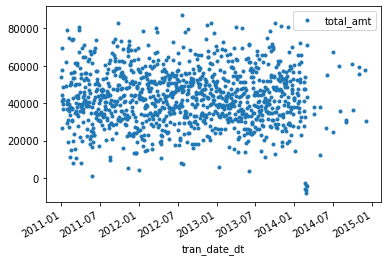

In [28]:
df[['tran_date_dt', 'total_amt']].groupby('tran_date_dt').sum().plot(style='.')

In [29]:
df[df['transaction_id'] == 34843015447]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt
743,34843015447,274338,9/12/2011,1,1,3,756,238.14,2506.14,e-Shop,Clothing,Women,2011,2011-09-12


In [30]:
df[df['tran_date_dt'] > '2014-12-01']

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt
4,79536458466,271944,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women,2014,2014-12-02
2963,45649838090,273667,12/2/2014,11,6,1,1450,152.250,1602.250,e-Shop,Home and kitchen,Bath,2014,2014-12-02
3983,74023090711,271180,12/2/2014,8,3,3,271,85.365,898.365,Flagship store,Electronics,Personal Appliances,2014,2014-12-02
4954,12323853707,273552,12/2/2014,12,6,4,510,214.200,2254.200,TeleShop,Home and kitchen,Tools,2014,2014-12-02
4955,89214951500,273322,12/2/2014,12,6,1,1166,122.430,1288.430,TeleShop,Home and kitchen,Tools,2014,2014-12-02
7004,15403541663,266794,12/2/2014,3,2,2,322,67.620,711.620,e-Shop,Footwear,Women,2014,2014-12-02
10121,60596009595,274652,12/2/2014,12,5,4,183,76.860,808.860,MBR,Books,Academic,2014,2014-12-02
10122,17146707816,274897,12/2/2014,12,5,3,622,195.930,2061.930,MBR,Books,Academic,2014,2014-12-02
11093,97409887219,267466,12/2/2014,4,4,1,78,8.190,86.190,e-Shop,Bags,Women,2014,2014-12-02
12089,23525861068,268100,12/2/2014,1,2,3,1318,415.170,4369.170,TeleShop,Footwear,Mens,2014,2014-12-02


In [31]:
df['tran_date_dt'] = pd.to_datetime(df['tran_date'], dayfirst=True)

In [32]:
df[df['transaction_id'] == 34843015447]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt
743,34843015447,274338,9/12/2011,1,1,3,756,238.14,2506.14,e-Shop,Clothing,Women,2011,2011-12-09


<AxesSubplot:xlabel='tran_date_dt'>

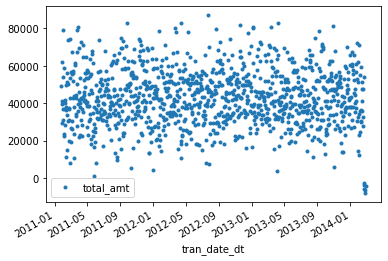

In [33]:
df[['tran_date_dt', 'total_amt']].groupby('tran_date_dt').sum().plot(style='.')

In [34]:
df["tran_date_dt"].describe(datetime_is_numeric=True)

count                            23053
mean     2012-08-09 05:21:26.617793280
min                2011-01-25 00:00:00
25%                2011-11-03 00:00:00
50%                2012-08-11 00:00:00
75%                2013-05-17 00:00:00
max                2014-02-28 00:00:00
Name: tran_date_dt, dtype: object

---

## Finding problems, even when we are not looking for them

**Each purchase (transaction_id) can be returned in full (all products), so there are lines with negative values. Let's add the quantities per transaction and get to know the variable.**

<AxesSubplot:>

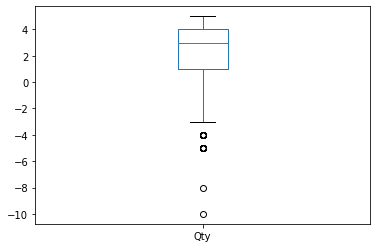

In [35]:
df.groupby("transaction_id")["Qty"].sum().plot(kind='box')

**As we have already realized, we have negative outliers that will correspond to returns.**

In [36]:
df.groupby("transaction_id")["Qty"].sum().describe()

count    20878.000000
mean         2.685794
std          1.666999
min        -10.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Qty, dtype: float64

In [37]:
df.groupby("transaction_id")["Qty"].sum().rename('Qty_sum').reset_index().groupby("Qty_sum").count()

,transaction_id
Qty_sum,
-10,1
-8,1
-5,22
-4,26
-3,17
-2,27
-1,23
0,1942
1,3820


In [38]:
df['prod_cat'].unique()

array(['Clothing', 'Electronics', 'Books', 'Home and kitchen', 'Footwear',
       'Bags'], dtype=object)

In [39]:
df[df.groupby('transaction_id')['Qty'].transform('sum') < 0]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt
147,7232517558,267707,14-10-2013,1,1,-1,-611,64.155,-675.155,Flagship store,Clothing,Women,2013,2013-10-14
154,7232517558,267707,8/10/2013,1,1,-1,-611,64.155,-675.155,Flagship store,Clothing,Women,2013,2013-10-08
157,7232517558,267707,6/10/2013,1,1,1,611,64.155,675.155,Flagship store,Clothing,Women,2013,2013-10-06
537,45975085761,270677,2/8/2012,1,1,-4,-192,80.640,-848.640,e-Shop,Clothing,Women,2012,2012-08-02
539,45975085761,270677,1/8/2012,1,1,-4,-192,80.640,-848.640,e-Shop,Clothing,Women,2012,2012-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22907,93625023531,267489,26-06-2011,1,4,-5,-966,507.150,-5337.150,MBR,Bags,Mens,2011,2011-06-26
22911,93625023531,267489,22-06-2011,1,4,5,966,507.150,5337.150,MBR,Bags,Mens,2011,2011-06-22
22915,17562417547,267042,17-06-2011,1,4,-4,-200,84.000,-884.000,e-Shop,Bags,Mens,2011,2011-06-17
22916,17562417547,267042,16-06-2011,1,4,-4,-200,84.000,-884.000,e-Shop,Bags,Mens,2011,2011-06-16


In [40]:
df[df.groupby('transaction_id')['Qty'].transform('sum') == -10]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt
12630,426787191,273106,28-05-2012,1,2,-5,-109,57.225,-602.225,e-Shop,Footwear,Mens,2012,2012-05-28
12631,426787191,273106,28-05-2012,1,2,-5,-109,57.225,-602.225,e-Shop,Footwear,Mens,2012,2012-05-28
12640,426787191,273106,19-05-2012,1,2,-5,-109,57.225,-602.225,e-Shop,Footwear,Mens,2012,2012-05-19
12641,426787191,273106,18-05-2012,1,2,5,109,57.225,602.225,e-Shop,Footwear,Mens,2012,2012-05-18


**We can highlight all cases with a total quantity <0 so that the company / client can:**
+ Perform a separate analysis
+ See if there is an error and what type
+ Etc ...

In [41]:
df['to_check'] = df.groupby('transaction_id')['Qty'].transform('sum') < 0

In [42]:
df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt,to_check
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,2014,2014-02-28,False
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women,2014,2014-02-20,False
2,73713102191,268867,15-02-2014,1,1,1,714,74.970,788.970,MBR,Clothing,Women,2014,2014-02-15,False
3,57134739558,270625,14-02-2014,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women,2014,2014-02-14,False
4,79536458466,271944,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women,2014,2014-02-12,False


**Save the file:**

In [43]:
os.makedirs('output', exist_ok=True)
df[df['to_check']].to_csv(os.path.join('output', 'df_to_check.csv'), index=False)

**Exclude data in need of verification from analysis:**

In [44]:
# df = df[~df['to_check']]
# , inplace=True
df.drop(df[df['to_check']].index, inplace=True)

**Double-check**

In [45]:
df[df['to_check']]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt,to_check


**Delete the column (no longer needed)**

In [46]:
df.drop('to_check', axis=1, inplace=True)

---

### Missing Data

In [47]:
df.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
year                0
tran_date_dt        0
dtype: int64

**As previously verified, there is no *missing data* in the variables we have.**

---

**Save the file for later use.**

**As we made changes to the table, we need to reset the index before saving it as *feather*. (If we choose other formats, like csv, it is possible that this problem does not occur.**

In [48]:
os.makedirs('temp', exist_ok=True)
df.reset_index(drop=True).to_pickle(os.path.join('temp', 'df_eda.pkl'))

---

# Customers
**Before continuing the analysis, let's just take a look at the other file we have in our folder**

In [49]:
pd.read_csv(os.path.join(PATHTODATA, 'Customer.csv'), nrows=10)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4
1,269696,07-01-1970,F,8
2,268159,08-01-1970,F,8
3,270181,10-01-1970,F,2
4,268073,11-01-1970,M,1
5,273216,15-01-1970,F,5
6,266929,15-01-1970,M,8
7,275152,16-01-1970,M,4
8,275034,18-01-1970,F,4
9,273966,21-01-1970,M,8


In [50]:
customer = pd.read_csv(os.path.join(PATHTODATA, 'Customer.csv'), parse_dates=['DOB'], dayfirst=True)
customer.shape

(5647, 4)

In [51]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,1970-01-02,M,4.0
1,269696,1970-01-07,F,8.0
2,268159,1970-01-08,F,8.0
3,270181,1970-01-10,F,2.0
4,268073,1970-01-11,M,1.0


In [52]:
customer.DOB

0      1970-01-02
1      1970-01-07
2      1970-01-08
3      1970-01-10
4      1970-01-11
          ...    
5642   1992-12-19
5643   1992-12-24
5644   1992-12-25
5645   1992-12-27
5646   1992-12-29
Name: DOB, Length: 5647, dtype: datetime64[ns]

In [53]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   int64         
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5645 non-null   object        
 3   city_code    5645 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 176.6+ KB


In [54]:
customer.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

**It seems we have gender and city_code missing in 2 of our entries (could they be from the same customers?)**

In [55]:
customer[customer.Gender.isnull()]

,customer_Id,DOB,Gender,city_code
24,267199,1970-02-14,NaN,2.0
87,271626,1970-06-02,NaN,6.0


In [56]:
customer[customer["city_code"].isnull()]

,customer_Id,DOB,Gender,city_code
115,268447,1970-07-14,M,NaN
149,268709,1970-09-09,F,NaN


In [57]:
customer[customer["Gender"].isnull() | customer["city_code"].isnull()]

,customer_Id,DOB,Gender,city_code
24,267199,1970-02-14,NaN,2.0
87,271626,1970-06-02,NaN,6.0
115,268447,1970-07-14,M,NaN
149,268709,1970-09-09,F,NaN


**Upon a closer look, we can now tell to which customers the null values belong to.**

In [58]:
customer['city_code'].unique()

array([ 4.,  8.,  2.,  1.,  5.,  9.,  7., 10.,  6.,  3., nan])

------------

**Although we do not have city descriptions, the variable *city_code*, which is numeric here, should be seen as categorical.**

In [59]:
customer['city_code'] = customer['city_code'].astype('str')

In [60]:
customer['city_code'] = customer['city_code'].astype('category')

**The *Gender* variable is also a category.**

In [61]:
customer['Gender'] = customer['Gender'].astype('category')
customer['Gender']

0       M
1       F
2       F
3       F
4       M
       ..
5642    M
5643    M
5644    F
5645    F
5646    F
Name: Gender, Length: 5647, dtype: category
Categories (2, object): ['F', 'M']

In [62]:
customer.Gender.cat.rename_categories(['Feminino', 'Masculino'], inplace=True)
#pd.Series.rename_categories

In [63]:
customer.describe(include='category')

,Gender,city_code
count,5645,5647
unique,2,11
top,Masculino,3.0
freq,2892,595


**The variable *customer_Id* is not really a 'number'. We don't want to do operations with it. Likewise, we don't want to consider each customer Id as a different category. Let's change the type of variable to *string*.**

In [64]:
customer['customer_Id'] = customer['customer_Id'].astype('str')

In [65]:
customer.nunique()

customer_Id    5647
DOB            4056
Gender            2
city_code        11
dtype: int64

### Age
How to calculate *age*?
(For now, we will calculate the *age* for today (it will be useful for some examples). Later, when we add customer data to purchases, we will calculate *age* at the date of purchase, as it is a more useful variable)

In [66]:
relativedelta(pd.to_datetime('2020-10-31'), pd.to_datetime('2020-01-01'))

relativedelta(months=+9, days=+30)

In [67]:
customer['age'] = [relativedelta(pd.to_datetime('today'), i).years for i in customer.DOB]

In [68]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_Id  5647 non-null   object        
 1   DOB          5647 non-null   datetime64[ns]
 2   Gender       5645 non-null   category      
 3   city_code    5647 non-null   category      
 4   age          5647 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 144.0+ KB


---

**Save the file for later use.**

In [69]:
os.makedirs('temp', exist_ok=True)
customer.to_pickle(os.path.join('temp', 'customer_eda.pkl'))

---

# *Missing Data*

**Before 'closing', let's look at how to deal with * missing data * and the effect the statement has.**

**(For the purpose of our analysis, we will not do anything to the missing values, so here are the examples, but without saving changes)**

## Eliminate

In [70]:
tmp = customer.copy()
tmp.shape

(5647, 5)

In [71]:
tmp.dropna(how='all', axis=1)
# tmp.shape

,customer_Id,DOB,Gender,city_code,age
0,268408,1970-01-02,Masculino,4.0,51
1,269696,1970-01-07,Feminino,8.0,51
2,268159,1970-01-08,Feminino,8.0,51
3,270181,1970-01-10,Feminino,2.0,51
4,268073,1970-01-11,Masculino,1.0,51
...,...,...,...,...,...
5642,274474,1992-12-19,Masculino,2.0,28
5643,267666,1992-12-24,Masculino,6.0,28
5644,270476,1992-12-25,Feminino,3.0,28
5645,269626,1992-12-27,Feminino,5.0,28


In [72]:
tmp.shape

(5647, 5)

In [73]:
tmp.dropna(inplace=True)
tmp.shape

(5645, 5)

In [74]:
tmp[tmp["Gender"].isnull() | tmp["city_code"].isnull()]

,customer_Id,DOB,Gender,city_code,age


## Replace

In [75]:
tmp = customer.copy()
tmp.shape

(5647, 5)

**Replace the missing values of the city (category) with fashion.**
**In practice, what we are doing is assigning the city code represented more often to this data.**

In [76]:
tmp['city_code'].mode()[0]

'3.0'

In [77]:
tmp['city_code'] = tmp['city_code'].fillna(tmp['city_code'].mode()[0])

In [78]:
tmp.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      0
age            0
dtype: int64

In [79]:
tmp[tmp['customer_Id'].isin(["268447", "268709"])]

,customer_Id,DOB,Gender,city_code,age
115,268447,1970-07-14,Masculino,nan,50
149,268709,1970-09-09,Feminino,nan,50


In [80]:
tmp[tmp['city_code'].isnull()]

,customer_Id,DOB,Gender,city_code,age


---

**NOTE: The example below serves only the purpose of exemplifying other ways of imputing values.**

**Imagine that there were *missings* in the variable *total_amt***

In [81]:
df = pd.read_pickle(os.path.join('temp', 'df_eda.pkl'))

In [82]:
df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,year,tran_date_dt
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,2014,2014-02-28
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women,2014,2014-02-20
2,73713102191,268867,15-02-2014,1,1,1,714,74.970,788.970,MBR,Clothing,Women,2014,2014-02-15
3,57134739558,270625,14-02-2014,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women,2014,2014-02-14
4,79536458466,271944,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women,2014,2014-02-12


In [83]:
tmp_2 = df[['transaction_id', 'total_amt']][df['total_amt']>0]

**For this analysis, let us consider only the positive *total_amt* values. However, depending on the purpose of the analysis, if we had excluded returned purchases, this filter would not be necessary.**

In [84]:
tmp_2.head()

,transaction_id,total_amt
1,80712190438,4265.300
2,73713102191,788.970
3,57134739558,3287.375
4,79536458466,2201.160
6,54730601969,563.550


In [85]:
tmp_2.shape

(20761, 2)

In [86]:
tmp_2.isnull().sum()

transaction_id    0
total_amt         0
dtype: int64

**Create NaN values to illustrate example:**

In [87]:
idx_list = np.random.choice(tmp_2.index, replace=False, size=5)

In [88]:
idx_list

array([ 5427, 20232,  5593, 13483, 21343])

In [89]:
tmp_2.loc[tmp_2.index.isin(idx_list), 'total_amt'] = np.nan 

In [90]:
tmp_2.isnull().sum()

transaction_id    0
total_amt         5
dtype: int64

**Calculate mean and median:**

In [111]:
mean = tmp_2['total_amt'].mean()
median = tmp_2['total_amt'].median()
print(
    f'mean: {mean:.02f}\n'
    f'median: {median:.02f}'
)

mean: 2607.46
median: 2090.66


<AxesSubplot:ylabel='Frequency'>

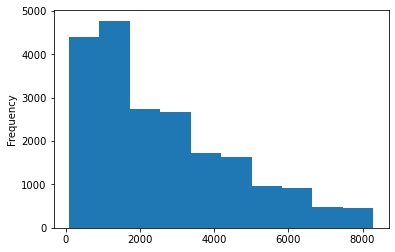

In [92]:
tmp_2['total_amt'].plot(kind='hist')

**In this case, it may make more sense to substitute for the median than for the mean (skewed distribution)**</br>
**It is also a good policy to keep information about the fact that we have replaced *missing* (or *outliers*) values**

In [93]:
tmp_2['missing'] = tmp_2['total_amt'].isnull()

In [94]:
tmp_2.head()

,transaction_id,total_amt,missing
1,80712190438,4265.300,False
2,73713102191,788.970,False
3,57134739558,3287.375,False
4,79536458466,2201.160,False
6,54730601969,563.550,False


In [95]:
# replace by median
tmp_2['total_amt'].fillna(mediana, inplace=True)

In [96]:
# replace by mean
tmp_2['total_amt'].fillna(tmp_2.mean(), inplace=True)

In [97]:
tmp_2.isnull().sum()

transaction_id    0
total_amt         0
missing           0
dtype: int64

# *Outliers*

**Missing data and outliers are two things that we must always analyze. It is a good idea to check outliers in general. Especially if we are going fit models.**</br> **But it also depends on the particular case, because there are also models sensitive to outliers.**


<AxesSubplot:>

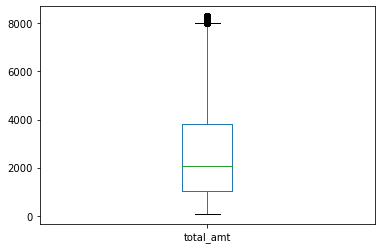

In [98]:
pos_total = df[df['total_amt'] > 0][['total_amt']]
pos_total.plot(kind='box') #mustache diagram box. We can see that there are outliers even without knowing what they are.

In [99]:
pos_total

,total_amt
1,4265.300
2,788.970
3,3287.375
4,2201.160
6,563.550
...,...
22698,2347.020
22699,5762.575
22700,1994.525
22701,1624.350


**Slightly skewed distribution: it is better to assume that it is not "normal" (Gaussian) - Detect with IQR - Inter quartile interval**

In [100]:
pos_total.describe()

,total_amt
count,20761.000000
mean,2607.688973
std,1963.201843
min,77.350000
25%,1030.965000
50%,2090.660000
75%,3818.880000
max,8287.500000


In [101]:
iqr = 3818.880000 - 1030.965000
iqr

2787.915

In [102]:
q1, q3 = np.percentile(pos_total, [25, 75])
iqr = q3 - q1
q1, q3, iqr

(1030.965, 3818.88, 2787.915)

Podemos criar uma variável que identifique outliers

In [103]:
#lb = lower bound, up = upper bound
#1.5 represents a fixed value, a safety distance. standard deviation represents a measure of sample variability.

lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr 
print(lb, ub)
pos_total['outlier'] = (pos_total['total_amt'] < lb) | (pos_total['total_amt'] > ub)

-3150.9074999999993 8000.7525


**As previously stated, in this case, we would hardly make a decision to eliminate / limit the values.**</br>
**The following information shows how to do it if the decision was the opposite.**

In [104]:
pos_total['outlier'].sum()

157

In [105]:
pos_total['total_amt_na'] = pos_total['total_amt'] # new column with the total_amt values
pos_total.loc[pos_total.outlier, 'total_amt_na'] = np.nan # to replace, in this case by NaN

## Limit

**Here we use the limitspreviously created limits, but it may make sense to use other values (such as percentiles 1 and 99, allowable 'maximum' values, etc.)**

In [106]:
pos_total['total_amt_cap'] = np.clip(pos_total['total_amt'], lb, ub)
pos_total.describe()

,total_amt,total_amt_na,total_amt_cap
count,20761.000000,20604.000000,20761.000000
mean,2607.688973,2565.418016,2606.521407
std,1963.201843,1909.760248,1959.932093
min,77.350000,77.350000,77.350000
25%,1030.965000,1023.230000,1030.965000
50%,2090.660000,2070.770000,2090.660000
75%,3818.880000,3761.420000,3818.880000
max,8287.500000,8000.200000,8000.752500


<AxesSubplot:>

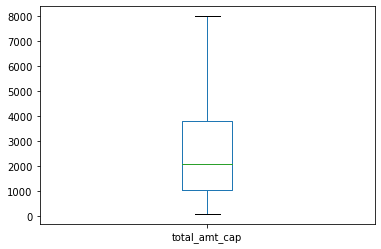

In [107]:
pos_total ['total_amt_cap'].plot(kind = 'box')

## Eliminate

In [108]:
pos_total[pos_total['outlier']].index

Int64Index([   79,    90,   117,   368,   475,   504,   821,   949,   952,
              962,
            ...
            21020, 21022, 21091, 21208, 21759, 21928, 22186, 22192, 22340,
            22481],
           dtype='int64', length=157)

In [109]:
pos_total.drop(pos_total[pos_total['outlier']].index, inplace=True)
pos_total.describe()

,total_amt,total_amt_na,total_amt_cap
count,20604.000000,20604.000000,20604.000000
mean,2565.418016,2565.418016,2565.418016
std,1909.760248,1909.760248,1909.760248
min,77.350000,77.350000,77.350000
25%,1023.230000,1023.230000,1023.230000
50%,2070.770000,2070.770000,2070.770000
75%,3761.420000,3761.420000,3761.420000
max,8000.200000,8000.200000,8000.200000


**NOTE: It is a good policy to 'save' the values before we delete them, as we did with the "errors" we detected.**